# Quick Start


To jump right into planetsca, we are going to assume that you have some Planet Scope images already saved. This notebook demonstrates using a pre-trained model to predict snow covered areas.

In [1]:
import glob

import matplotlib.pyplot as plt
import xarray as xr

import planetsca as ps

/home/jovyan/envs/planetenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# retrieve the pre-trained ONNX planetsca model from Hugging Face
model = ps.download.retrieve_model_onnx()

In [3]:
# get a list of filepaths to Planet Scope images
ps_image_filepaths = glob.glob("./example_images*/*/PSScene/*SR_clip.tif")[-2:]
ps_image_filepaths

['./example_images/6ac34a8c-a2a3-453b-88d4-d9679e0f4087/PSScene/20240116_174947_73_2483_3B_AnalyticMS_SR_clip.tif',
 './example_images/6ac34a8c-a2a3-453b-88d4-d9679e0f4087/PSScene/20240123_170724_19_24bc_3B_AnalyticMS_SR_clip.tif']

In [4]:
# where we want to save the resulting SCA geotif images created from the Planet images
output_dirpath = "./example_images/SCA/"

In [5]:
# run the model to predict SCA
sca_image_paths = ps.predict.predict_sca_onnx(
    planet_path=ps_image_filepaths,
    model=model,
    output_dirpath=output_dirpath,
)

Start to predict: 20240116_174947_73_2483_3B_AnalyticMS_SR_clip.tif
Image dimension: (4, 374, 287)
Save SCA map to:  ./example_images/SCA/20240116_174947_73_2483_3B_AnalyticMS_SR_clip_SCA.tif
Start to predict: 20240123_170724_19_24bc_3B_AnalyticMS_SR_clip.tif
Image dimension: (4, 374, 287)
Save SCA map to:  ./example_images/SCA/20240123_170724_19_24bc_3B_AnalyticMS_SR_clip_SCA.tif


Visualize the results!

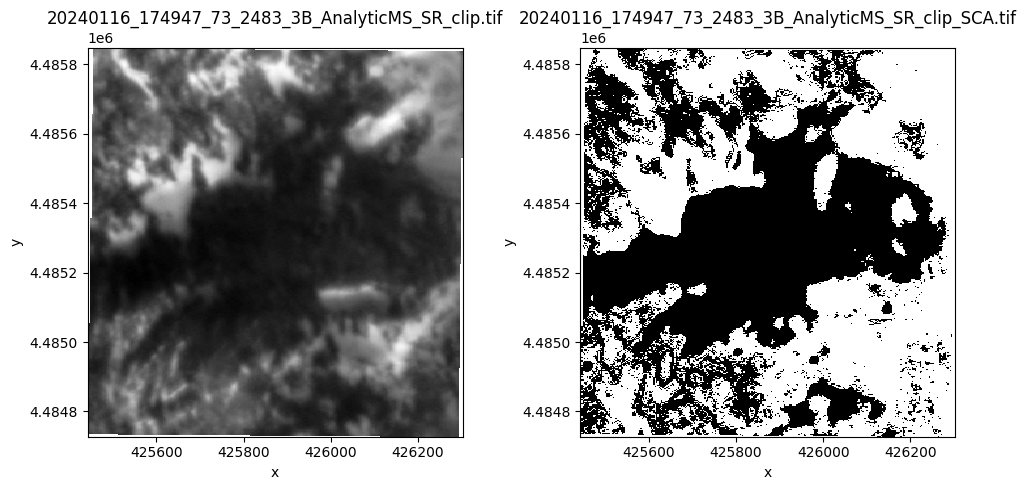

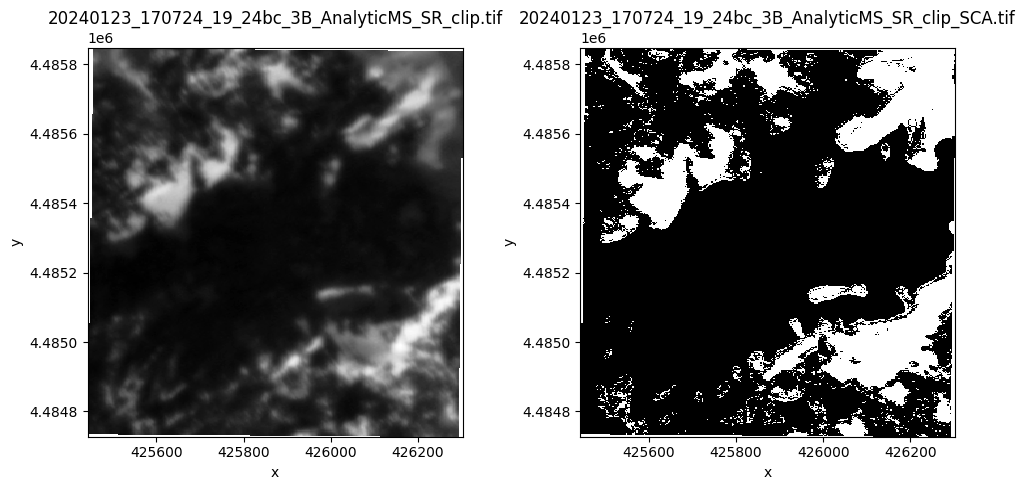

In [6]:
ps_image_filepaths.sort()
sca_image_paths.sort()

for ps_image_filepath, sca_image_filepath in zip(ps_image_filepaths, sca_image_paths):
    ps_image = xr.open_dataset(ps_image_filepath)
    sca_image = xr.open_dataset(sca_image_filepath)

    fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), tight_layout=True)
    ps_image.isel(band=0).band_data.plot(ax=ax1, cmap="Greys_r", add_colorbar=False)
    sca_image.isel(band=0).band_data.plot(ax=ax2, cmap="Greys_r", add_colorbar=False)

    ax1.set_title(ps_image_filepath.split("/")[-1])
    ax2.set_title(sca_image_filepath.split("/")[-1])